# First training with crop_part_1 (real) and 1m_face_00 (fake) 

In [1]:
import os
import cv2
import glob
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
import tensorflow as tf

TRAIN_RATIO = 0.8
VALIDATION_RATIO = 0.2

## Reading training data and assigning to np arrays

In [2]:
# Listing images in the folder and shuffling filenames in case they are ordered by age,characteristics, etc...
real_faces_file_list = glob.glob("crop_part1/train_1/*")
random.shuffle(real_faces_file_list)
# Calculatin length for training and validation sets
train_real_faces_length = int((len(real_faces_file_list) * TRAIN_RATIO))
validation_real_faces_length =  int((len(real_faces_file_list) * VALIDATION_RATIO))

# Reading real faces images and converting them to np arrays

# for fname in real_faces_file_list:
#     image = cv2.imread(fname)
#     train_real_faces.append(np.array(image))
                                      
                                      
                                      
train_real_faces = np.array([np.array(cv2.imread(fname)) for fname in real_faces_file_list[:train_real_faces_length]])
validation_real_faces = np.array([np.array(cv2.imread(fname)) for fname in real_faces_file_list[train_real_faces_length:]])

# Label for real faces (0) np array of zeroes
train_real_labels = np.full(train_real_faces_length,0)
validation_real_labels = np.full(validation_real_faces_length,0)

In [3]:
# Listing images in the folder and shuffling filenames in case they are ordered by age,characteristics, etc...
fake_faces_file_list = glob.glob("./1m_faces_00-200x200/train_1/*")
random.shuffle(fake_faces_file_list)

# Calculatin length for training and validation sets
train_fake_faces_length = int(((len(fake_faces_file_list)-(len(fake_faces_file_list)-1000)) * TRAIN_RATIO))
validation_fake_faces_length = int(((len(fake_faces_file_list)-(len(fake_faces_file_list)-1000)) * VALIDATION_RATIO))
# Reading real faces images and converting them to np arrays
train_fake_faces = np.array([np.array(cv2.imread(fname)) for fname in fake_faces_file_list[:train_fake_faces_length]])
validation_fake_faces = np.array([np.array(cv2.imread(fname)) for fname in fake_faces_file_list[train_fake_faces_length:train_fake_faces_length+validation_fake_faces_length]])

train_fake_labels = np.full(train_fake_faces_length, 0)
validation_fake_labels = np.full(validation_fake_faces_length,1)

In [4]:
train_real_faces.shape

(800, 200, 200, 3)

In [5]:
"""fake_faces_file_list[0].split("\\")[1]"""

'fake_faces_file_list[0].split("\\")[1]'

In [6]:
#FUNCTION FOR SPLITTING THE IMAGES IN SETS OF 1000 images per folder 
""""import os
import cv2
import glob
import random
files_list = glob.glob("crop_part1/*")
random.shuffle(files_list)
i = 0
for fname in files_list:
    if(i == 1000):
        break
    if("train_" in fname):
        print("train_ folder")
        continue
  
    im_temp = cv2.imread(fname)
    cv2.imwrite("/home/mgaldi/CS486/crop_part1/train_6/"+fname.split("/")[1], im_temp)
    os.remove("/home/mgaldi/CS486/crop_part1/"+fname.split("/")[1])
    i = i+1
""""

SyntaxError: EOL while scanning string literal (<ipython-input-6-4b07764c360d>, line 20)

In [ ]:
"""im_rgb = cv2.cvtColor(train_real_faces[0], cv2.COLOR_BGR2RGB)"""

In [4]:
train_real_faces = train_real_faces / 255.0
train_fake_faces = train_fake_faces / 255.0
#train_ps_faces = train_ps_faces / 255.0
validation_real_faces = validation_real_faces / 255.0
validation_fake_faces = validation_fake_faces / 255.0
#validation_ps_faces = validation_ps_faces / 255.0

In [5]:
train_x = np.concatenate((train_real_faces, train_fake_faces))#,train_ps_faces
validation_x = np.concatenate((validation_real_faces, validation_fake_faces))#,validation_ps_faces
train_y = np.concatenate((train_real_labels,train_fake_labels))#,train_ps_labels
validation_y = np.concatenate((validation_real_labels,validation_fake_labels))#,validation_ps_labels

In [6]:
validation_y.shape

(400,)

In [ ]:
# indices = np.arange(train_real_fake_ps_faces.shape[0])
# np.random.shuffle(indices)
# indices


In [6]:
model = models.Sequential()
model.add(layers.Conv2D(200, (3, 3), activation='relu', input_shape=(200, 200, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(400, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(400, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(400, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(400, (3, 3), activation='relu'))

In [7]:
# model = models.Sequential()
# model.add(layers.Conv2D(200, (3, 3), activation='relu', input_shape=(200, 200, 3)))
# model.add(layers.Conv2D(400, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(400, (3, 3), activation='relu'))
# model.add(layers.Conv2D(400, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 200)     5600      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 200)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 400)       720400    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 400)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 400)       1440400   
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 400)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 400)       1

In [9]:
model.add(layers.Flatten())
model.add(layers.Dense(400, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

In [12]:
model.compile(optimizer='adam',
              loss=tf.nn.softmax_cross_entropy_with_logits(),
             # tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_x, train_y, epochs=10, batch_size=50,
                    validation_data=(validation_x, validation_y),shuffle=True)

TypeError: softmax_cross_entropy_with_logits_v2() missing 2 required positional arguments: 'labels' and 'logits'

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

validation_loss, validation_acc = model.evaluate(validation_x,  validation_y, verbose=2)

In [15]:
model.save("/tmp/model_train_1.h5")

# Training model with 9k more pictures

In [1]:
import os
import cv2
import glob
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
import tensorflow as tf
TRAIN_RATIO = 0.8
VALIDATION_RATIO = 0.2

In [2]:
real_faces_file_list = glob.glob("real_and_fake_face/training_real-200x200/*")
random.shuffle(real_faces_file_list)
# train_real_faces_length = int(((len(real_faces_file_list)-(len(real_faces_file_list)-1000)) * TRAIN_RATIO))
# validation_real_faces_length =  int(((len(real_faces_file_list)-(len(real_faces_file_list)-1000)) * VALIDATION_RATIO))
train_real_faces_length = int((len(real_faces_file_list) * TRAIN_RATIO))
validation_real_faces_length = int((len(real_faces_file_list) * VALIDATION_RATIO))
train_real_faces = np.array([np.array(cv2.imread(fname)) for fname in real_faces_file_list[:train_real_faces_length]])
validation_real_faces = np.array([np.array(cv2.imread(fname)) for fname in real_faces_file_list[train_real_faces_length:]])

train_real_labels = np.full(train_real_faces_length,0)
validation_real_labels = np.full(validation_real_faces_length,0)

In [3]:
print(train_real_faces_length)
print(validation_real_faces_length)
print(len(train_real_faces))
print(len(validation_real_faces))

864
216
864
217


In [4]:
fake_faces_file_list = glob.glob("real_and_fake_face/training_fake-200x200/*")
random.shuffle(fake_faces_file_list)
# train_fake_faces_length = int(((len(fake_faces_file_list)-(len(fake_faces_file_list)-1000)) * TRAIN_RATIO))
# validation_fake_faces_length = int(((len(fake_faces_file_list)-(len(fake_faces_file_list)-1000)) * VALIDATION_RATIO))
train_fake_faces_length = int((len(fake_faces_file_list) * TRAIN_RATIO))
validation_fake_faces_length = int((len(fake_faces_file_list) * VALIDATION_RATIO))

train_fake_faces = np.array([np.array(cv2.imread(fname)) for fname in fake_faces_file_list[:train_fake_faces_length]])
validation_fake_faces = np.array([np.array(cv2.imread(fname)) for fname in fake_faces_file_list[train_fake_faces_length:]])

train_fake_labels = np.full(train_fake_faces_length,1)
validation_fake_labels = np.full(validation_fake_faces_length,1)

In [5]:
print(train_fake_faces_length)
print(validation_fake_faces_length)
print(len(train_fake_faces))
print(len(validation_fake_faces))

768
192
768
192


In [6]:
train_real_faces = train_real_faces / 255.0
train_fake_faces = train_fake_faces / 255.0
#train_ps_faces = train_ps_faces / 255.0
validation_real_faces = validation_real_faces / 255.0
validation_fake_faces = validation_fake_faces / 255.0
#validation_ps_faces = validation_ps_faces / 255.0

In [7]:
train_real_fake_ps_faces = np.concatenate((train_real_faces, train_fake_faces))#,train_ps_faces
validation_real_fake_ps_faces = np.concatenate((validation_real_faces, validation_fake_faces))#,validation_ps_faces
train_real_fake_ps_labels = np.concatenate((train_real_labels,train_fake_labels))#,train_ps_labels
validation_real_fake_ps_labels = np.concatenate((validation_real_labels,validation_fake_labels))#,validation_ps_labels

In [8]:
model = tf.keras.models.load_model('/tmp/model_train_10_ps.h5')

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_real_fake_ps_faces, train_real_fake_ps_labels, epochs=15, batch_size=50,
                    validation_data=(validation_real_fake_ps_faces, validation_real_fake_ps_labels),shuffle=True)

Epoch 1/15
33/33 [==============================] - ETA: 0s - loss: 1.2456 - accuracy: 0.5319

ValueError: Data cardinality is ambiguous:
  x sizes: 409
  y sizes: 408
Make sure all arrays contain the same number of samples.

5/5 - 1s - loss: 3.0954 - accuracy: 0.5688


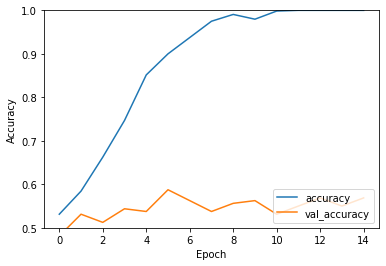

In [10]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

validation_loss, validation_acc = model.evaluate(validation_real_fake_ps_faces,  validation_real_fake_ps_labels, verbose=2)

In [11]:
model.save("/tmp/model_train_11_ps_kaggle.h5")

## Testing

# Training with PS images (classified as real)

In [ ]:
# model.predict(test_fake_faces)

In [ ]:
# preds = model.predict(test_real_fake_faces)

In [ ]:
# np.max(preds)

In [ ]:
# for i in range(len(preds)):
#     if(preds[i][0] > preds[i][1]):
#         print("Real")
#     else:
#         print("Fake")

In [ ]:
# import pandas as pd
# df = pd.DataFrame(preds, columns=['Real', 'Fake'])

In [ ]:
# df

In [ ]:
# im_temp = cv2.imread("./real_image.jpg")
# im_temp = cv2.resize(im_temp, (200, 200))
# cv2.imwrite("/home/mgaldi/CS486/real_image-200x200.jpg", im_temp)

In [ ]:
# im_temp = cv2.imread("./real_image-200x200.jpg")

In [ ]:
# img = np.array([im_temp])

In [ ]:
# img.shape

In [ ]:
# test_img = img/255.0


In [ ]:
# model.predict(test_img)